In [1]:
import pandas as pd
import numpy as np 

In [2]:
df1 = pd.read_excel(r"C:\Users\prasa\OneDrive\Documents\KC\CODES 2024\project24\CSV_XLXS\Sales_1\e-commerce sales dataset _01.xlsx")
df2 = pd.read_excel(r"C:\Users\prasa\OneDrive\Documents\KC\CODES 2024\project24\CSV_XLXS\Sales_1\e-commerce sales dataset _02.xlsx")
df3 = pd.read_excel(r"C:\Users\prasa\OneDrive\Documents\KC\CODES 2024\project24\CSV_XLXS\Sales_1\e-commerce sales dataset _03.xlsx")
df4 = pd.read_excel(r"C:\Users\prasa\OneDrive\Documents\KC\CODES 2024\project24\CSV_XLXS\Sales_1\e-commerce sales dataset _04.xlsx")
print(df1.shape)
print(df1.info())
print(df2.shape)
print(df2.info())
print(df3.shape)
print(df3.info())
print(df4.shape)
print(df4.info())

(15, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         15 non-null     int64 
 1   Product Name  15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes
None
(100, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         100 non-null    int64  
 1   Suburb        100 non-null    object 
 2   City          100 non-null    object 
 3   postcode      100 non-null    int64  
 4   Longitude     100 non-null    float64
 5   Latitude      100 non-null    float64
 6   Full Address  100 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB
None
(50, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (tota

In [3]:
print(df1.describe(include='all'))
print(df2.describe(include='all'))
print(df3.describe(include='all'))
print(df4.describe(include='all'))

            Index Product Name
count   15.000000           15
unique        NaN           15
top           NaN    Product 1
freq          NaN            1
mean     8.333333          NaN
std      5.163978          NaN
min      1.000000          NaN
25%      4.500000          NaN
50%      8.000000          NaN
75%     11.500000          NaN
max     20.000000          NaN
             Index     Suburb       City     postcode   Longitude    Latitude  \
count   100.000000        100        100   100.000000  100.000000  100.000000   
unique         NaN         87         45          NaN         NaN         NaN   
top            NaN  Dannemora  Waitakere          NaN         NaN         NaN   
freq           NaN          3          7          NaN         NaN         NaN   
mean     50.500000        NaN        NaN  4293.670000  174.225363  -39.717151   
std      29.011492        NaN        NaN  2901.742215    2.122058    3.171271   
min       1.000000        NaN        NaN   112.000000  168.02

In [4]:
print(df1['Product Name'].nunique())
print(df2['City'].value_counts())
print(df2['Suburb'].value_counts())
print(df3['Customer Names'].nunique())
print(df4[['Product Description Index', 'Order Quantity', 'Unit Price', 'Total Revenue']].nunique())

15
Waitakere            7
Christchurch         7
Hamilton             7
Auckland             6
Manukau              6
Napier               5
Palmerston North     4
South Waikato        4
Thames-Coromandel    3
North Shore          3
Whangarei            3
Dunedin              3
Tasman               2
Southland            2
Waitaki              2
Tararua              2
Upper Hutt           2
Clutha               2
Wanganui             2
Timaru               2
Taupo                2
Rotorua              1
Central Otago        1
Wellington           1
Matamata-Piako       1
Franklin             1
Queenstown-Lakes     1
Hauraki              1
Waimate              1
Rangitikei           1
Invercargill         1
Tauranga             1
Waipa                1
Kapiti Coast         1
Porirua              1
Waimakariri          1
Gisborne             1
New Plymouth         1
Far North            1
Hastings             1
Nelson               1
Rodney               1
Papakura             1
Waitomo 

In [8]:
# Check for duplicates
print(df1.duplicated().sum())
print(df2.duplicated().sum())
print(df3.duplicated().sum())
print(df4.duplicated().sum())

0
0
0
42


In [9]:
# Check for missing values
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())
print(df4.isnull().sum())

Index           0
Product Name    0
dtype: int64
Index           0
Suburb          0
City            0
postcode        0
Longitude       0
Latitude        0
Full Address    0
dtype: int64
Customer Index    0
Customer Names    0
dtype: int64
Product Description Index    0
Order Quantity               0
Unit Price                   0
Total Unit Cost              0
Total Revenue                0
dtype: int64


In [1]:
# Merge sales details with product type
#merged_df = pd.merge(df4, df1, left_on='Product Description Index', right_on='Index', how='left')

# Merge with customer names
#merged_df = pd.merge(merged_df, df3, left_on='Product Description Index', right_on='Customer Index', how='left')

# Merge with regional data
#merged_df = pd.merge(merged_df, df2, left_on='Index_x', right_on='Index', how='left')  # Assuming 'Index_x' is common

In [11]:
merged_df = pd.merge(df4, df1, left_on='Product Description Index', right_on='Index', how='left')

In [12]:
merged_df = pd.merge(merged_df, df3, left_on='Product Description Index', right_on='Customer Index', how='left')

In [13]:
# Inspect the columns of merged_df after the previous merges
print(merged_df.columns)


Index(['Product Description Index', 'Order Quantity', 'Unit Price',
       'Total Unit Cost', 'Total Revenue', 'Index', 'Product Name',
       'Customer Index', 'Customer Names'],
      dtype='object')


In [14]:
# Check column names in df2
print(df2.columns)

Index(['Index', 'Suburb', 'City', 'postcode', 'Longitude', 'Latitude',
       'Full Address'],
      dtype='object')


In [15]:
# Adjust the column names based on your inspection
merged_df = pd.merge(merged_df, df2, left_on='Index', right_on='Index', how='left')

In [16]:
print(merged_df.describe(include= 'all'))

        Product Description Index  Order Quantity   Unit Price  \
count                 7991.000000     7991.000000  7991.000000   
unique                        NaN             NaN          NaN   
top                           NaN             NaN          NaN   
freq                          NaN             NaN          NaN   
mean                     6.340383        8.456889  2284.536504   
std                      4.116455        2.283776  1673.096364   
min                      1.000000        5.000000   167.500000   
25%                      2.000000        6.000000  1031.800000   
50%                      7.000000        8.000000  1849.200000   
75%                     11.000000       10.000000  3611.300000   
max                     14.000000       12.000000  6566.000000   

        Total Unit Cost  Total Revenue        Index Product Name  \
count       7991.000000    7991.000000  7991.000000         7991   
unique              NaN            NaN          NaN           14   
top

In [17]:
print(merged_df.duplicated().sum())

42


In [18]:
merged_df.drop_duplicates(inplace=True)

In [19]:
merged_df.isnull().sum()

Product Description Index    0
Order Quantity               0
Unit Price                   0
Total Unit Cost              0
Total Revenue                0
Index                        0
Product Name                 0
Customer Index               0
Customer Names               0
Suburb                       0
City                         0
postcode                     0
Longitude                    0
Latitude                     0
Full Address                 0
dtype: int64

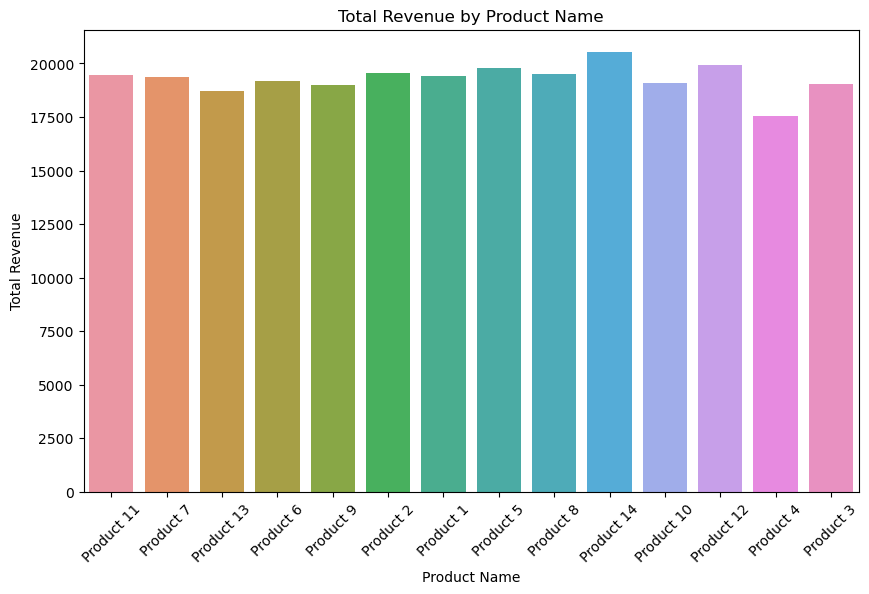

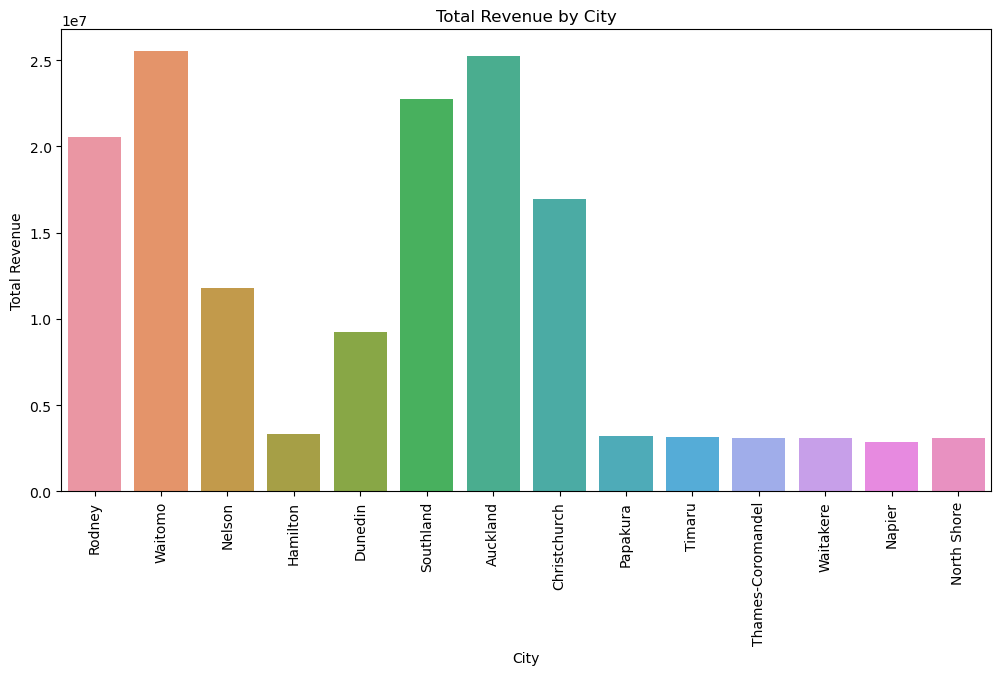

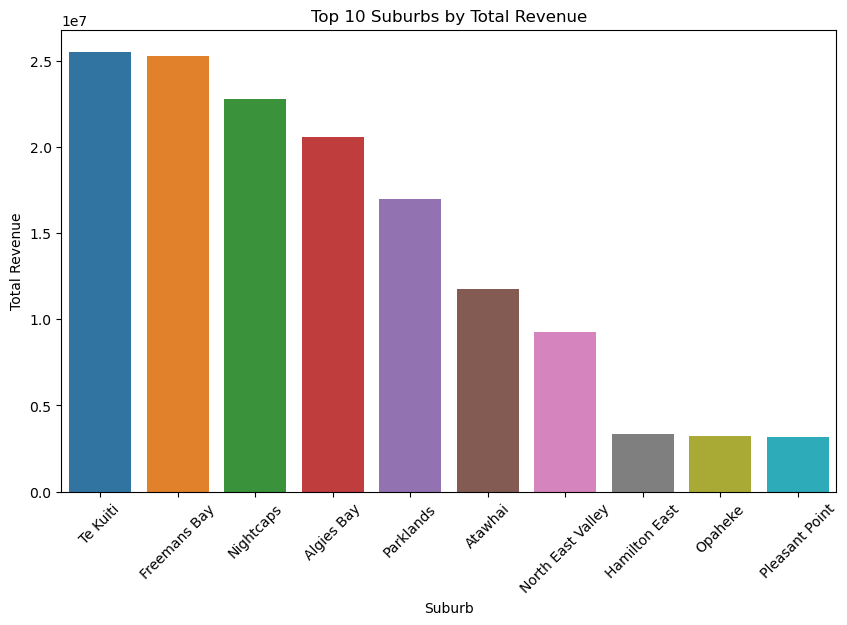

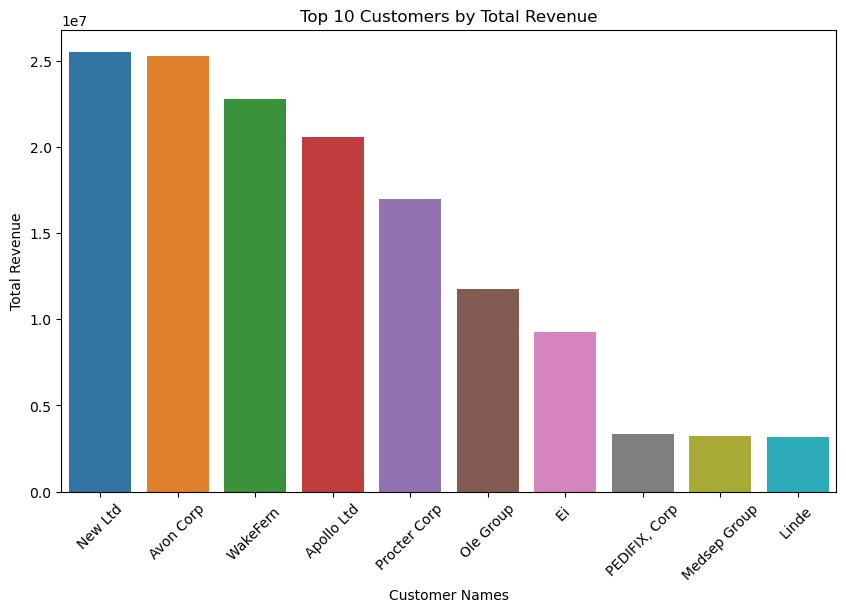

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of Total Revenue by Product Name
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='Product Name', y='Total Revenue', ci=None)
plt.xticks(rotation=45)
plt.title('Total Revenue by Product Name')
plt.show()

# City-wise Total Revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='City', y='Total Revenue', estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title('Total Revenue by City')
plt.show()

# Suburb-wise Total Revenue (Top 10)
top_suburbs = merged_df.groupby('Suburb')['Total Revenue'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_suburbs, x='Suburb', y='Total Revenue', ci=None)
plt.xticks(rotation=45)
plt.title('Top 10 Suburbs by Total Revenue')
plt.show()

# Revenue contribution by each customer
top_customers = merged_df.groupby('Customer Names')['Total Revenue'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='Customer Names', y='Total Revenue', ci=None)
plt.xticks(rotation=45)
plt.title('Top 10 Customers by Total Revenue')
plt.show()


In [24]:
# Calculate Profit Margin
merged_df['Profit Margin'] = (merged_df['Total Revenue'] - merged_df['Total Unit Cost']) / merged_df['Total Revenue']

# Basic descriptive statistics
desc_stats = merged_df[['Order Quantity', 'Unit Price', 'Total Unit Cost', 'Total Revenue', 'Profit Margin']].describe()
print("Descriptive Statistics:\n", desc_stats)

# Calculate Correlation Matrix
correlation_matrix = merged_df[['Order Quantity', 'Unit Price', 'Total Unit Cost', 'Total Revenue', 'Profit Margin']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Descriptive Statistics:
        Order Quantity   Unit Price  Total Unit Cost  Total Revenue  \
count     7949.000000  7949.000000      7949.000000    7949.000000   
mean         8.456535  2288.277997      1434.495893   19371.161542   
std          2.283731  1674.593078      1113.405827   15598.056772   
min          5.000000   167.500000        68.675000     837.500000   
25%          6.000000  1031.800000       607.221000    7973.000000   
50%          8.000000  1855.900000      1084.797000   14003.000000   
75%         10.000000  3618.000000      2045.108000   27483.400000   
max         12.000000  6566.000000      5498.556000   78711.600000   

       Profit Margin  
count    7949.000000  
mean        0.919680  
std         0.029629  
min         0.830000  
25%         0.902500  
50%         0.925714  
75%         0.941818  
max         0.966667  
Correlation Matrix:
                  Order Quantity  Unit Price  Total Unit Cost  Total Revenue  \
Order Quantity         1.000000    0.

In [25]:
# Calculate the correlation matrix for the relevant numerical columns
correlation_matrix = merged_df[['Order Quantity', 'Unit Price', 'Total Unit Cost', 'Total Revenue', 'Profit Margin']].corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                  Order Quantity  Unit Price  Total Unit Cost  Total Revenue  \
Order Quantity         1.000000    0.005298         0.000090       0.338420   
Unit Price             0.005298    1.000000         0.942098       0.910372   
Total Unit Cost        0.000090    0.942098         1.000000       0.854887   
Total Revenue          0.338420    0.910372         0.854887       1.000000   
Profit Margin          0.779851    0.002328        -0.155780       0.262695   

                 Profit Margin  
Order Quantity        0.779851  
Unit Price            0.002328  
Total Unit Cost      -0.155780  
Total Revenue         0.262695  
Profit Margin         1.000000  


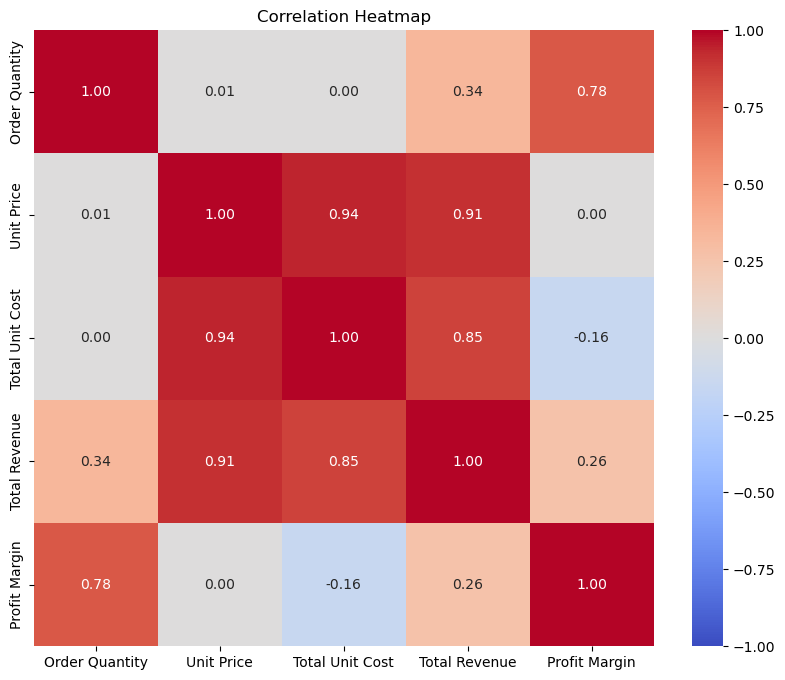

In [26]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Mean Squared Error: 15108497.870775599
R-squared: 0.9417483644577488


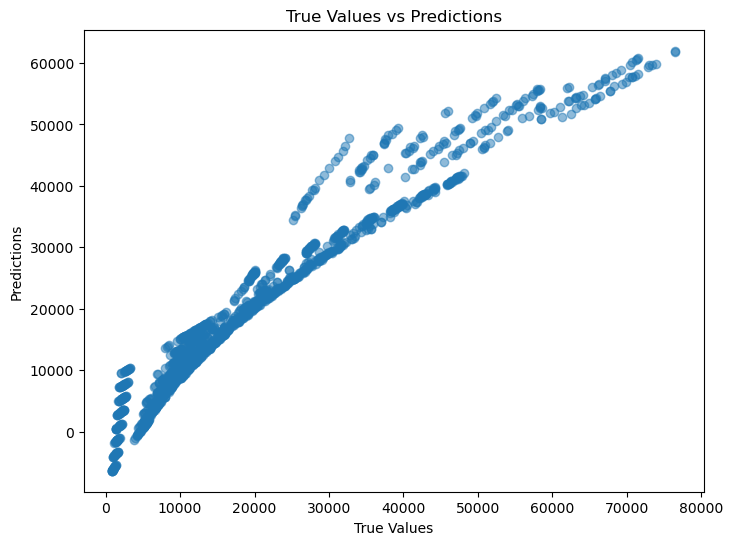

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Features and Target
X = merged_df[['Order Quantity', 'Unit Price', 'Total Unit Cost']]  # Update with relevant features
y = merged_df['Total Revenue']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Predictions vs True Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

In [28]:
# Grouping by 'Product Name' and summarizing 'Total Revenue'
grouped_df = merged_df.groupby('Product Name').agg({
    'Total Revenue': ['mean', 'sum'],
    'Order Quantity': 'mean',
    'Unit Price': 'mean'
}).reset_index()

print(grouped_df)

   Product Name Total Revenue             Order Quantity   Unit Price
                         mean         sum           mean         mean
0     Product 1  19398.464236  25276198.9       8.389102  2306.244896
1    Product 10  19104.330675   3114005.9       8.484663  2214.617178
2    Product 11  19482.102652  20573100.4       8.505682  2302.769697
3    Product 12  19931.340385   3109289.1       8.589744  2300.505128
4    Product 13  18735.376433  11765816.4       8.541401  2198.890924
5    Product 14  20550.739216   3144263.1       8.457516  2409.547712
6     Product 2  19534.445236  22757628.7       8.456652  2288.599227
7     Product 3  19045.228571   3066281.8       8.757764  2194.270807
8     Product 4  17529.378528   2857288.7       8.423313  2121.598160
9     Product 5  19792.518415  16981980.8       8.375291  2359.040326
10    Product 6  19202.392529   3341216.3       8.316092  2318.392529
11    Product 7  19389.850912  25517043.8       8.395137  2319.997188
12    Product 8  194

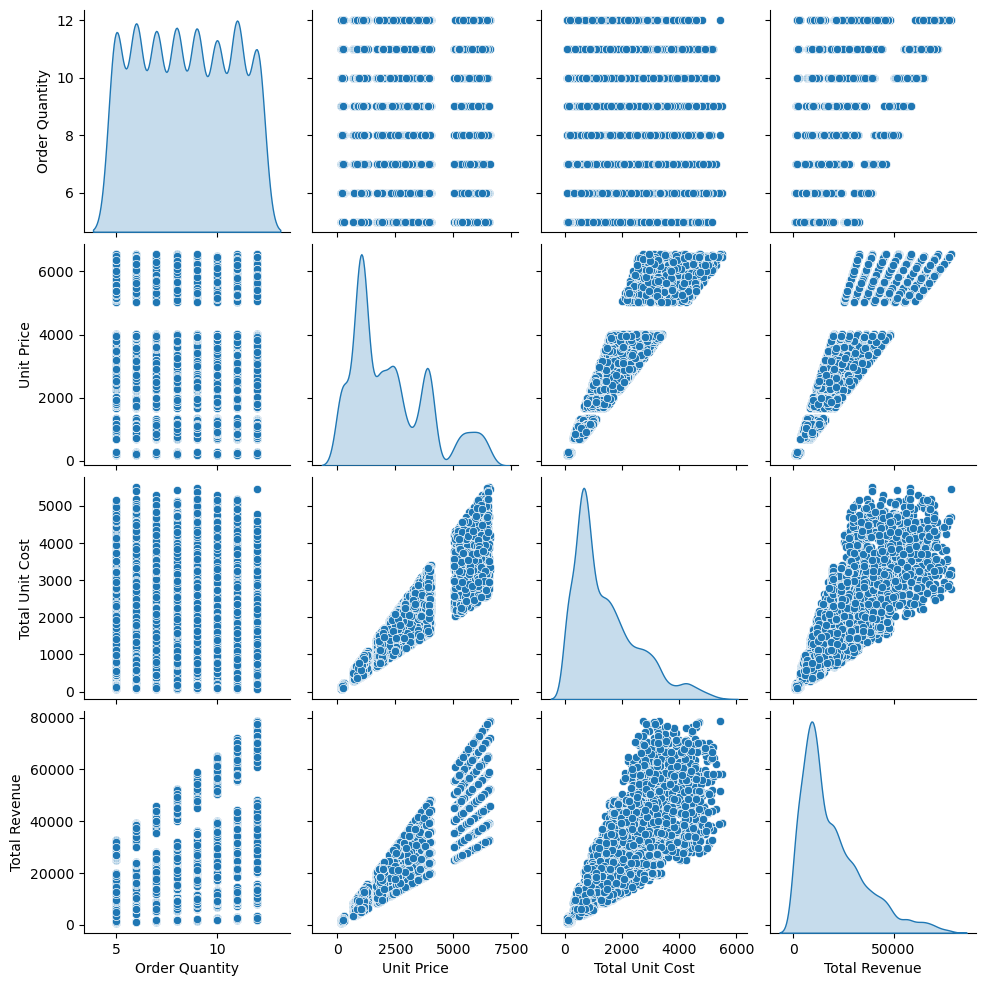

In [32]:
# Assuming `df` is your DataFrame with relevant features and target variable
sns.pairplot(merged_df[['Order Quantity', 'Unit Price', 'Total Unit Cost', 'Total Revenue']], diag_kind='kde')
plt.show()
